# Predict Student Performance

In this notebook, I will be performing some data analysis and attempt to predict student performance using some basic feature engineering as well as some machine learning algorithms. The "performance" will be measured by the final grade that the student receives in the class.

The dataset for this project was grabbed from the [UCI database](https://archive.ics.uci.edu/dataset/320/student+performance) and cited below in the citation section.

For the different features that will be analyzed, as well as additional information will be within the student.txt file in the student folder.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.option_context('mode.use_inf_as_na', True)

%matplotlib inline

# Grabbing the Data

For the purposes of my analysis (and because this is my first personal ml project 👍), I will be reducing the amount of features that I will be working with as well as only analyzing the data within the student-mat.csv file.

In [2]:
data = pd.read_csv("student/student-mat.csv", sep=";")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# Some information about the data

There are a total of 30 different features that can be used to predict the performance of the students. The performance will be evaluated by three different "grades": G1, G2, and G3 which correspond to the 1st period grade, 2nd period grade, and the final grade respectively. For now, I will just analyze the final grade G3. There's a mix of both categorical as well as numeric data, so for now I will just drop the categorical fields and select a couple of the numerical fields for simplicity. Note: I can hot encode some of the fields, such as sex, school, romantic, etc.. by using pd.get_dummies in order glean more info from the data.

In [5]:
df = data[["Medu", "Fedu", "studytime", "failures", "health", "absences", "G3"]]
df.head()

,Medu,Fedu,studytime,failures,health,absences,G3
0,4,4,2,0,3,6,6
1,1,1,2,0,3,4,6
2,1,1,2,3,3,10,10
3,4,2,3,0,5,2,15
4,3,3,2,0,5,4,10


# Data Exploration

Next we'll explore the data a bit.

<Axes: xlabel='Medu', ylabel='count'>

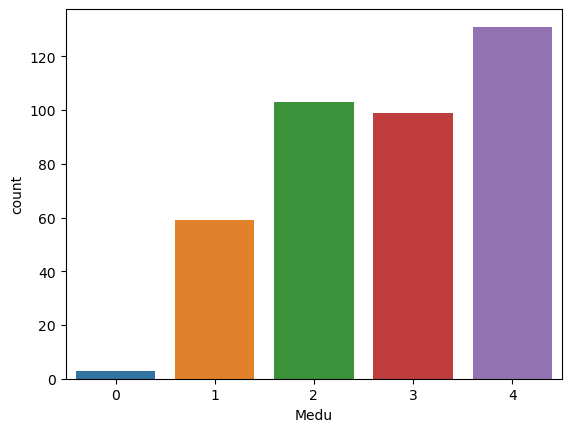

In [6]:
sns.countplot(data=df, x="Medu")

<Axes: xlabel='Medu', ylabel='G3'>

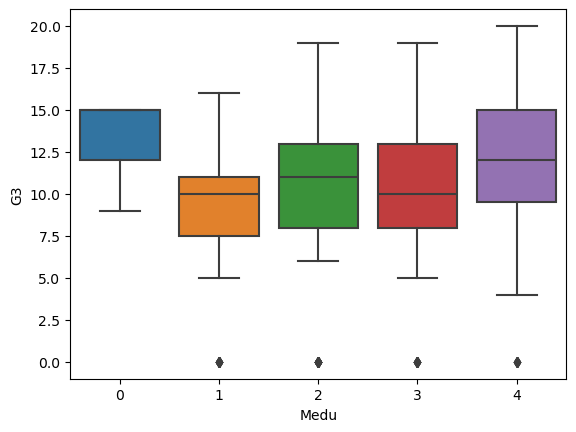

In [7]:
sns.boxplot(data=df, x="Medu", y="G3")

<Axes: xlabel='Fedu', ylabel='count'>

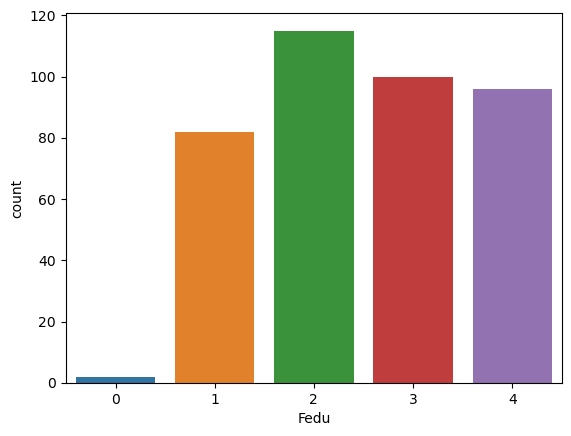

In [8]:
sns.countplot(data=df, x="Fedu")

<Axes: xlabel='Fedu', ylabel='G3'>

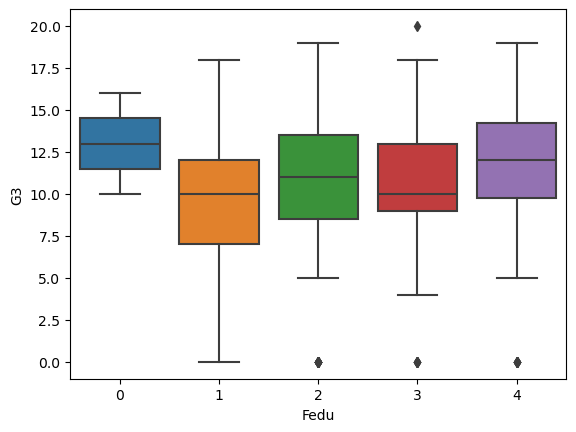

In [9]:
sns.boxplot(data=df, x="Fedu", y="G3")

# Medu and Fedu Conclusions
An initial look at the education levels of both mother's and father's seems to show the slight trend that as the education levels of the parents go up, so do the final scores acheived by the students. Note that in both the Medu and the Fedu boxplots that the parent education level 0 was actually the highest, but does appears to be due to the low amount of available data.

<Axes: xlabel='studytime', ylabel='G3'>

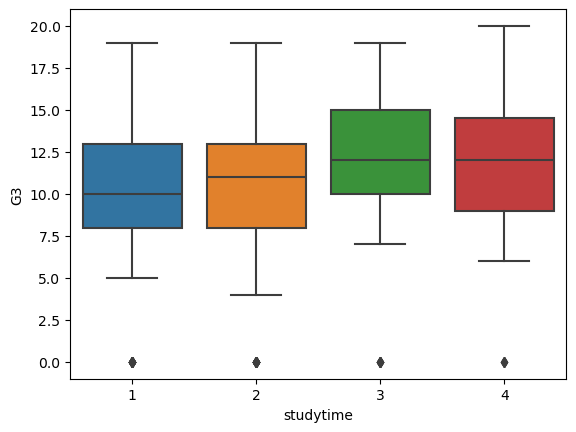

In [10]:
sns.boxplot(data=df, x="studytime", y="G3")

<Axes: xlabel='failures', ylabel='G3'>

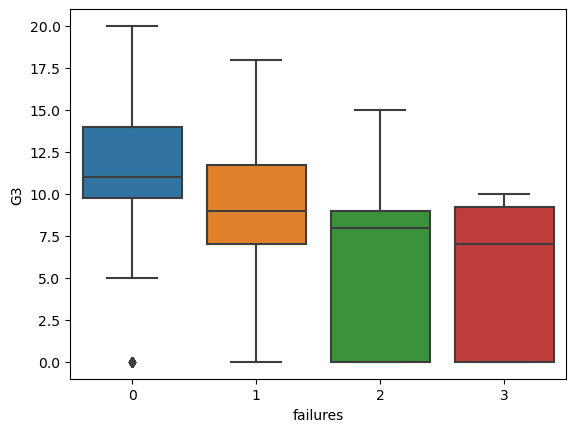

In [11]:
sns.boxplot(data=df, x="failures", y="G3")

# Studytime and Failures Conclusions

An initial look at the studytime and failures metrics suggests trends that are not too suprising. Students that spent more time studying received higher final grades and students that had less failures also tended to receive higher final grades.

<Axes: xlabel='health', ylabel='count'>

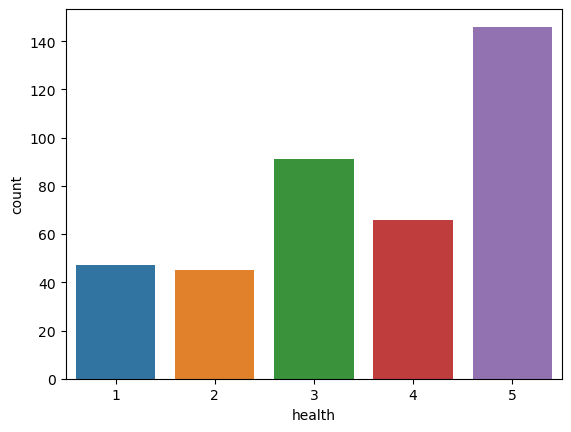

In [12]:
sns.countplot(data=df, x="health")

<Axes: xlabel='health', ylabel='G3'>

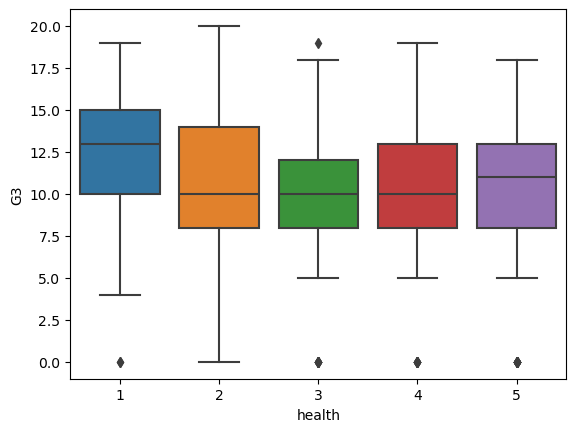

In [13]:
sns.boxplot(data=df, x="health", y="G3")

C:\Users\dezha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='absences', ylabel='Count'>

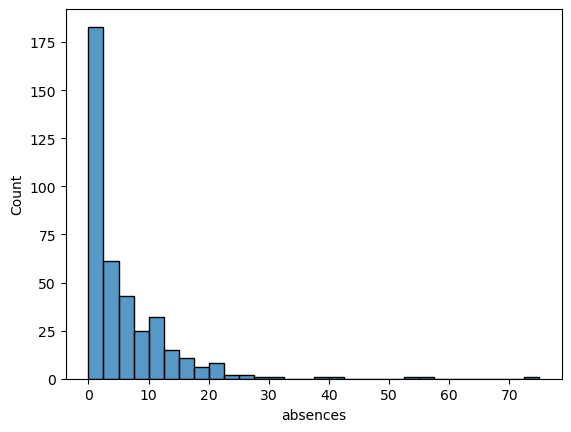

In [14]:
sns.histplot(data=df, x="absences", bins=30)

In the histplot above we see that the majority of the amount of absences are less than 5, so what I will do to get a more meaningful look at the absences data is that I will create a new column in df that will group the absences into 4 different bins. The different bins will be "0-1", "2-3", "4-5", and ">5".

In [15]:
def create_bins(val):
    if val >= 0 and val <= 1:
        return "0-1"
    elif val <= 3:
        return "2-3"
    elif val <= 5:
        return "4-5"
    else:
        return ">5"

df["abs_bins"] = df["absences"].apply(create_bins)    
df.head()

C:\Users\dezha\AppData\Local\Temp\ipykernel_6936\816499649.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["abs_bins"] = df["absences"].apply(create_bins)


,Medu,Fedu,studytime,failures,health,absences,G3,abs_bins
0,4,4,2,0,3,6,6,>5
1,1,1,2,0,3,4,6,4-5
2,1,1,2,3,3,10,10,>5
3,4,2,3,0,5,2,15,2-3
4,3,3,2,0,5,4,10,4-5


<Axes: xlabel='abs_bins', ylabel='count'>

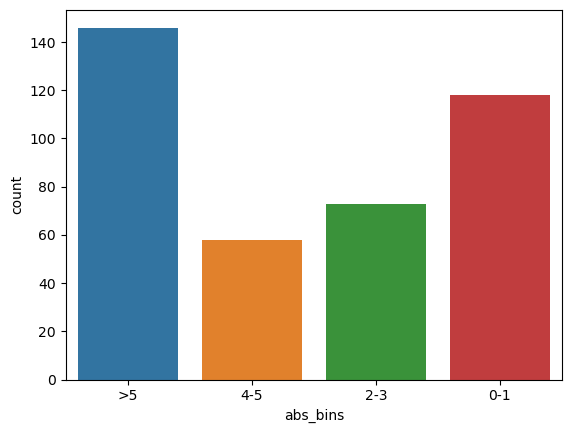

In [16]:
sns.countplot(data=df, x="abs_bins")

<Axes: xlabel='abs_bins', ylabel='G3'>

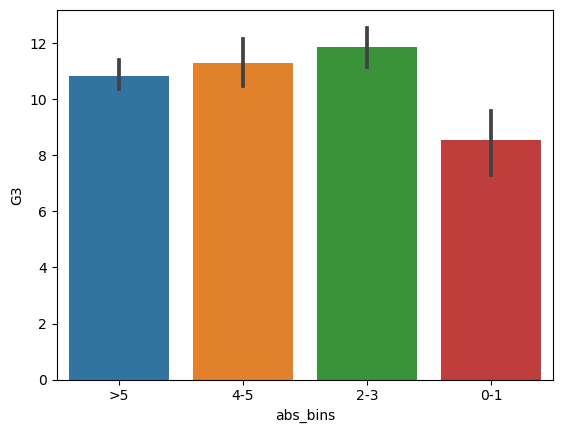

In [17]:
sns.barplot(data=df, x="abs_bins", y="G3")

<Axes: xlabel='abs_bins', ylabel='failures'>

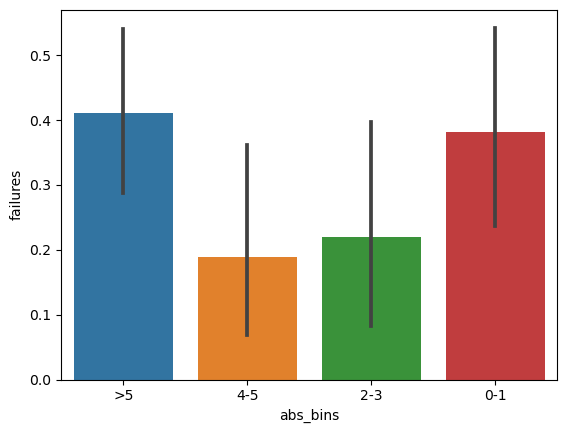

In [18]:
sns.barplot(data=df, x="abs_bins", y="failures")

# Health and Absence Conclusions

After an initial look at the data for health and absences, it revealed some interesting/unexpected trends. For health, it showed that the students with higher average final grades in the class tended to be either in very good health (5) or in very poor health (1), with the the middle ranges 2-4 performing about the same. My explanation for why this may be the case is because those that are very healthy tend to have better sleep/diet/exercise which contribute positively to learning, and those with bad health might be performing well because they tend to spend all their time studying, leading to their poor health. 

As for absences, it showed an inverse trend to what I was expecting. As absences increased, the average final grade in the class also "increased". My hunch for why this may be the case, is that students that miss the most amount class might already know the material and thus choose to not attend the class, explaining the higher final average grades. Something also interesting was that the number of failures on average when compared to the number of absenses showed 0-1 absences and >5 absences as being approximately the same.

# ML Algorithms

In this next upcoming section I will apply different machine learning algorithmns to the present data and try to create a prediction for what the final grade of the student received. The models that I will explore include: Linear Regression, Logistic Regression, Decision Tree, and the Random Forest ML algorithms. I suspect that the decision tree/random forest models will lead to the best performance. Also note that typically they would be train/test/validation sets but since there is a fairly small dataset (around 300), I will just be doing a train/test split.

# Linear Regression

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
# Creating train test split

X = df.drop(["G3", "abs_bins"], axis=1)
y= df["G3"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
# Creating linear regression model and fitting on the training data

linm = LinearRegression()
linm.fit(X_train, y_train)

LinearRegression()

In [22]:
# print the intercept
print(linm.intercept_)

# print the coefficients
coeff_df = pd.DataFrame(linm.coef_,X.columns,columns=['Coefficient'])
coeff_df

10.139624171048748


,Coefficient
Medu,0.590474
Fedu,-0.274560
studytime,0.273521
failures,-2.019335
health,-0.162723
absences,0.020776


The coefficients above suggest that as I increase Medu by 1 unit, the final grade of the student, G3, will increase by 0.59. This logic is applied to all the other coefficients as well. Looking at the coefficients, the two strongest indicators for G3 performance appear to be Medu and failures.

In [23]:
# Creating predictions
lin_pred = linm.predict(X_test)

C:\Users\dezha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='G3', ylabel='Count'>

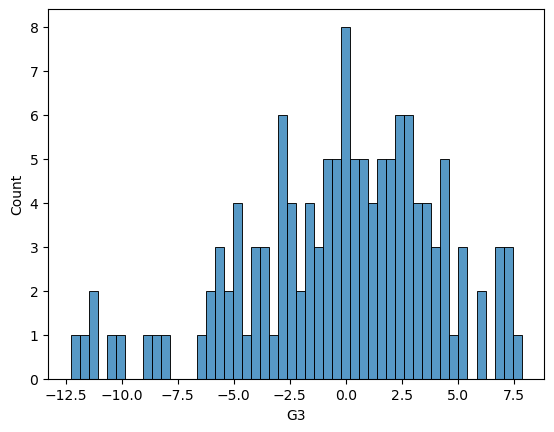

In [24]:
sns.histplot((y_test-lin_pred),bins=50)

In [25]:
from sklearn import metrics

In [26]:
# Evaluation of prediction results

print('MAE:', metrics.mean_absolute_error(y_test, lin_pred))
print('MSE:', metrics.mean_squared_error(y_test, lin_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lin_pred)))

MAE: 3.3664192011021012
MSE: 18.70256949989235
RMSE: 4.324646748567141


# Linear Regression Conclusion

The results from the linear regression were not too great (which was expected!). We returned a root mean squared error (RMSE) of approximately 4.32, which is massive considering that the G3 grading scale ranges from 0-20. The difference of approximately 1 between the mean absolute error and the RSME suggests that we had a decent amount of data ponts that were predicted with fairly significant error (also evidenced by the histplot above). 

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
# Creating logistic regression model and fitting on the training data

# Choosing 891 since this value is the point of convergence
logm = LogisticRegression(max_iter=891)
logm.fit(X_train, y_train)

LogisticRegression(max_iter=891)

In [29]:
# Create predictions
log_pred = logm.predict(X_test)

C:\Users\dezha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='G3', ylabel='Count'>

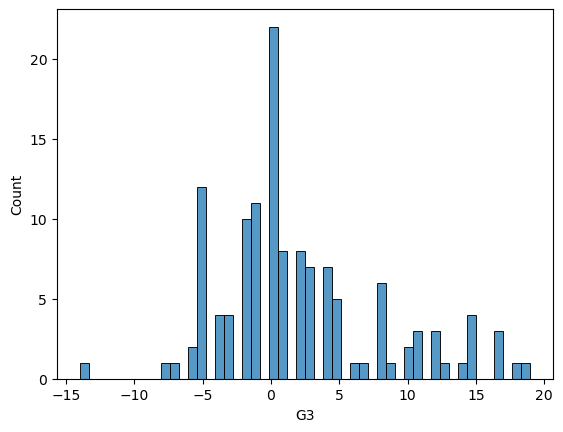

In [30]:
sns.histplot((y_test-log_pred),bins=50)

In [31]:
# Evaluation of prediction results

print('MAE:', metrics.mean_absolute_error(y_test, log_pred))
print('MSE:', metrics.mean_squared_error(y_test, log_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, log_pred)))

MAE: 4.519083969465649
MSE: 42.2442748091603
RMSE: 6.4995595857842785


# Logistic Regression Conclusion

The results from the logistic regression model yielded less than ideal results. Overall, it performed worse that the linear regression model. Although the logistic regression did appear to classify more data points with a near 0 error than the linear regression model, it performed extremely poorly elsewhere, predicting points on average with a larger error.

# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
dm = DecisionTreeRegressor()

In [46]:
dm.fit(X_train, y_train)

DecisionTreeRegressor()

In [47]:
dm_pred = dm.predict(X_test)

In [48]:
# Evaluation of prediction results

print('MAE:', metrics.mean_absolute_error(y_test, dm_pred))
print('MSE:', metrics.mean_squared_error(y_test, dm_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dm_pred)))

MAE: 3.985496183206106
MSE: 28.964368108566582
RMSE: 5.3818554522178115


The initial results do not appear to be very good. From here I will try to tweak the model a bit to receive better results, in particular I will try to get better results by changing the max_depth parameter and by evaluating with the elbow method.

In [50]:
results = []

for i in range(1, 21):
    dm = DecisionTreeRegressor(max_depth=i)
    dm.fit(X_train, y_train)
    dm_pred = dm.predict(X_test)

    results.append(np.sqrt(metrics.mean_squared_error(y_test, dm_pred)))

print(results)

[4.3293359387165955, 4.201354709063309, 4.0629838088521, 4.17218298979601, 4.640753230977026, 4.743105921048875, 4.875497061310409, 5.020591407209566, 5.022348666337008, 5.281204123721871, 5.33316515320074, 5.3434761615822515, 5.287412838126064, 5.369074736713386, 5.396020743500879, 5.351273104015289, 5.366408256386709, 5.3742261805644445, 5.354125342658916, 5.375468892895786]


Text(0, 0.5, 'Error Rate')

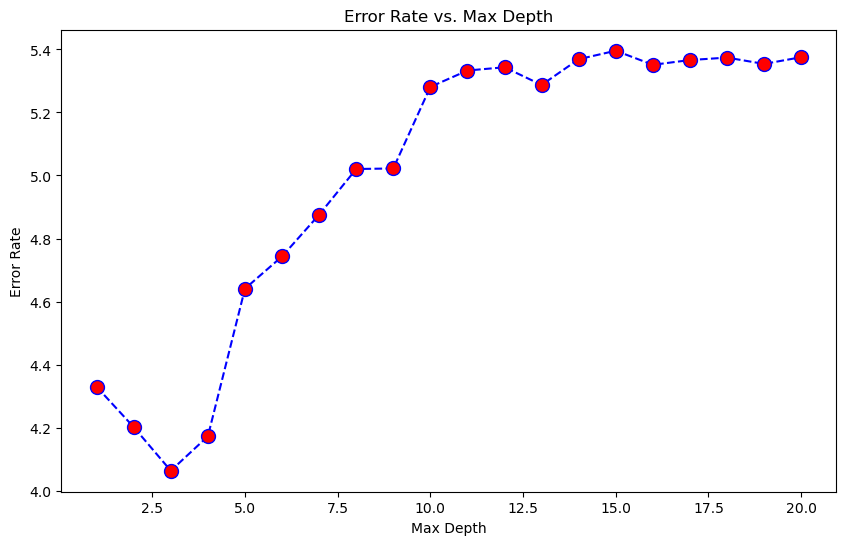

In [55]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21),results,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Error Rate')

Based on the above results, it appears that a K-value of approximately 3-4 performs the best, evaluated on mean squared error.

In [52]:
dm = DecisionTreeRegressor(max_depth=3)
dm.fit(X_train, y_train)
dm_pred = dm.predict(X_test)

In [53]:
# Evaluation of prediction results

print('MAE:', metrics.mean_absolute_error(y_test, dm_pred))
print('MSE:', metrics.mean_squared_error(y_test, dm_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dm_pred)))

MAE: 3.2158835392870024
MSE: 16.507837430994314
RMSE: 4.0629838088521


# Decision Tree Conclusion

The decision tree regressor appears to have generated the best results out of the three models used so far. With a  RMSE of about 4.06, it still isn't great but it will be likely improved upon using the next model, which will be the random forest model. One interesting result to note however is that overfitting occurs very quick with the decision tree model that I trained. This is probably due to small number of features present, so it would make sense that anything past a max depth of about 4-5 leads to overfitting.

# Citation

Cortez,Paulo. (2014). Student Performance. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T.